In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from statistics import mean, mode
from plotnine import ggplot, aes, geom_line, geom_histogram, geom_vline, ggsave
from scipy.stats import mstats
from scipy import stats
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
all_results = {}

In [3]:
cali = fetch_california_housing(as_frame=True).frame

In [4]:
cali[pd.isnull(cali).any(axis=1)].head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


As we can see in the results of the previous cell, there are no NAN values in the dataset, so we can continue without any data transformation or cleaning.

In [5]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


As we can see in the previous cell, the California Housing dataset is formed of 9 columns, all of them of the float64 type

In [6]:
for col in cali.columns:
    print("Col: {}\tMin: {}\tMean: {}\tMax: {}\tMode: {}\n".format(col, min(cali[col]), mean(cali[col]), max(cali[col]),mode(cali[col])))

Col: MedInc	Min: 0.4999	Mean: 3.8706710029069766	Max: 15.0001	Mode: 3.125

Col: HouseAge	Min: 1.0	Mean: 28.639486434108527	Max: 52.0	Mode: 52.0

Col: AveRooms	Min: 0.8461538461538461	Mean: 5.428999742190376	Max: 141.9090909090909	Mode: 5.0

Col: AveBedrms	Min: 0.3333333333333333	Mean: 1.096675149606208	Max: 34.06666666666667	Mode: 1.0

Col: Population	Min: 3.0	Mean: 1425.4767441860465	Max: 35682.0	Mode: 891.0

Col: AveOccup	Min: 0.6923076923076923	Mean: 3.0706551594363742	Max: 1243.3333333333333	Mode: 3.0

Col: Latitude	Min: 32.54	Mean: 35.63186143410853	Max: 41.95	Mode: 34.06

Col: Longitude	Min: -124.35	Mean: -119.56970445736434	Max: -114.31	Mode: -118.31

Col: MedHouseVal	Min: 0.14999	Mean: 2.0685581690891475	Max: 5.00001	Mode: 5.00001



/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: medinc.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 92'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 92'. Pick better value with 'binwidth'.


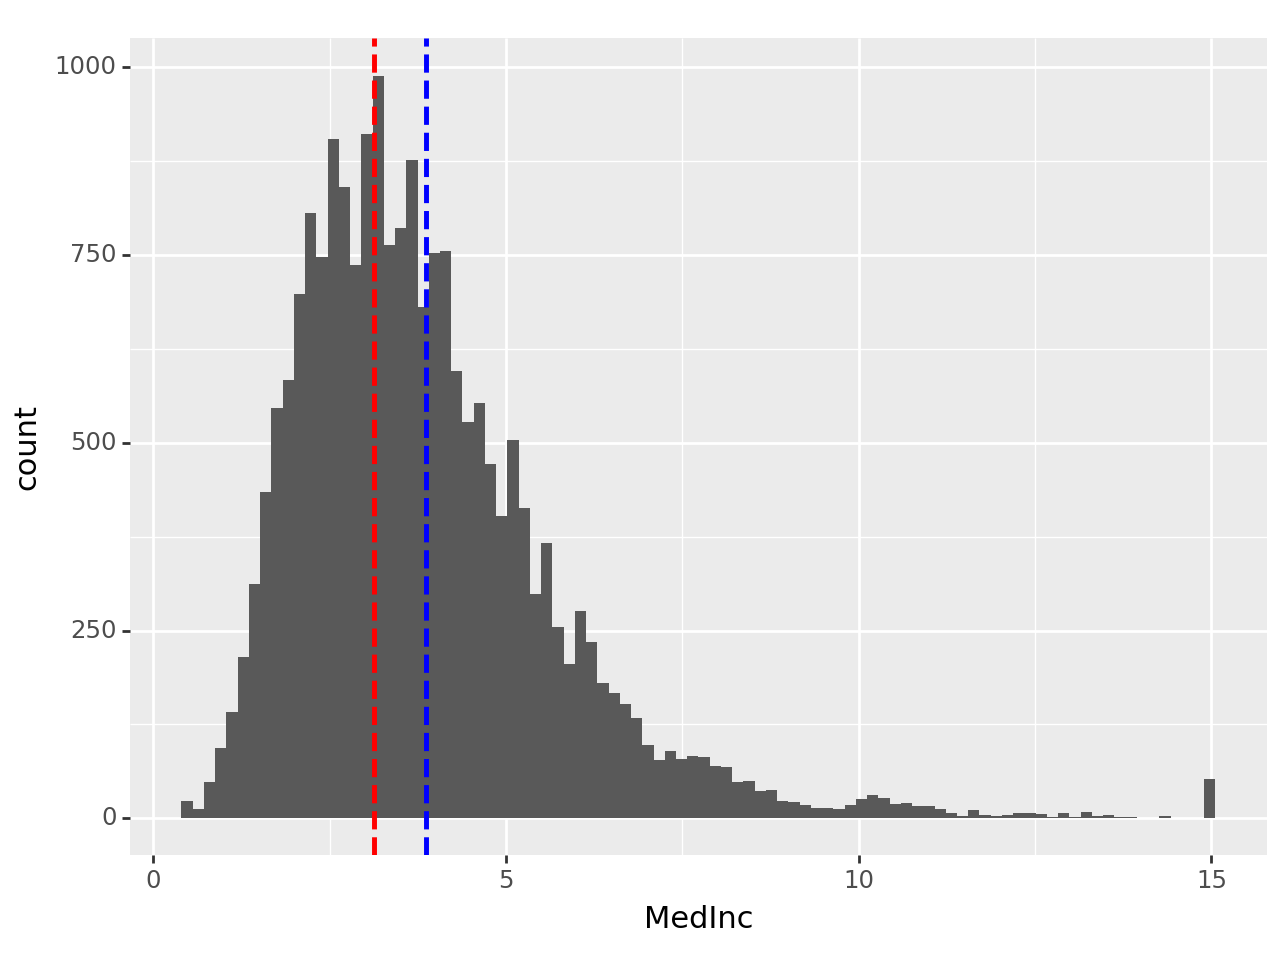

<Figure Size: (640 x 480)>

In [7]:
p = (
    ggplot(cali) + aes(x = "MedInc") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["MedInc"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["MedInc"])),
            color="red", linetype="dashed", size=1)
)
p.save(filename = 'medinc.png', height=5, width=5, units = 'in', dpi=1000)
p

Observed: MedInc variable is normally distributed (mostly) with a bias to the left. Most values are between 0 and 5. 

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: HouseAge.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


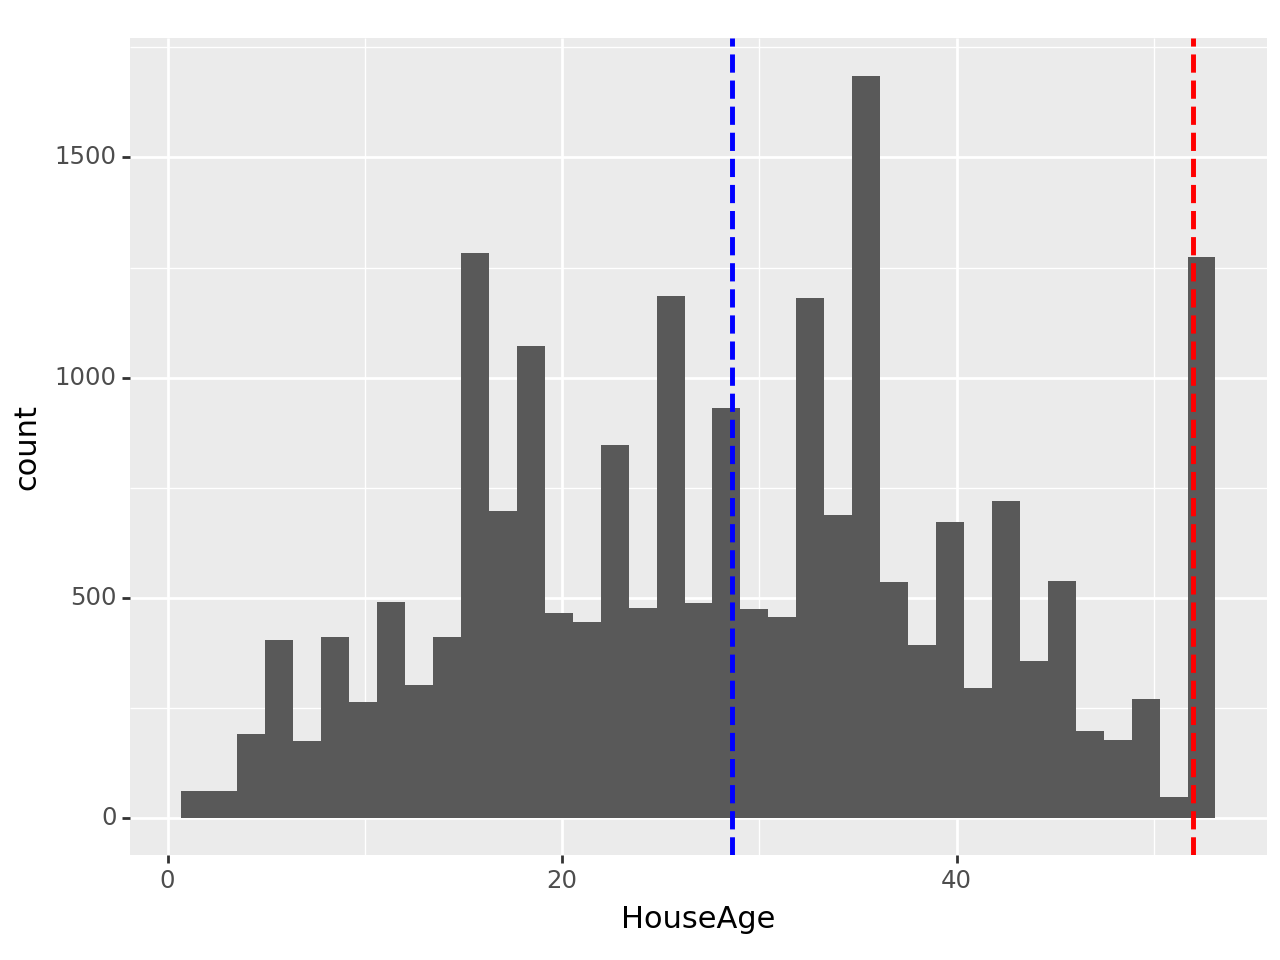

<Figure Size: (640 x 480)>

In [8]:
p = (
    ggplot(cali) + aes(x = "HouseAge") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["HouseAge"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["HouseAge"])),
            color="red", linetype="dashed", size=1)
)
p.save(filename = 'HouseAge.png', height=5, width=5, units = 'in', dpi=1000)
p

Observed: HouseAge does not seem to be normally distributed, with most of the observed values being on the right side of the graphic

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 1201'. Pick better value with 'binwidth'.


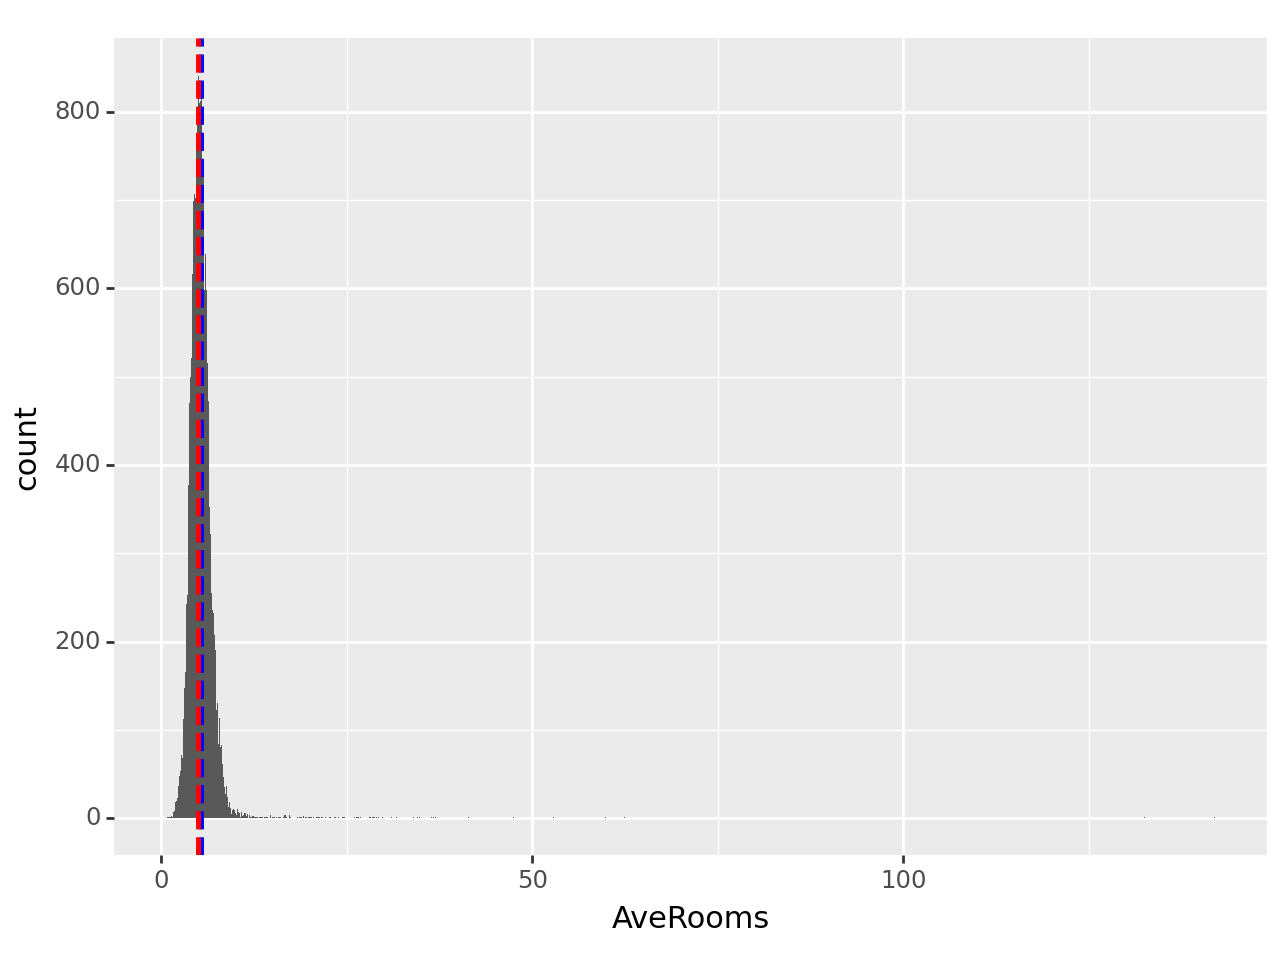

<Figure Size: (640 x 480)>

In [9]:
(
    ggplot(cali) + aes(x = "AveRooms") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["AveRooms"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["AveRooms"])),
            color="red", linetype="dashed", size=1)
)

Observed: The variable AveRooms seems to be normally distributed, with the most common value being 5 rooms

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 4952'. Pick better value with 'binwidth'.


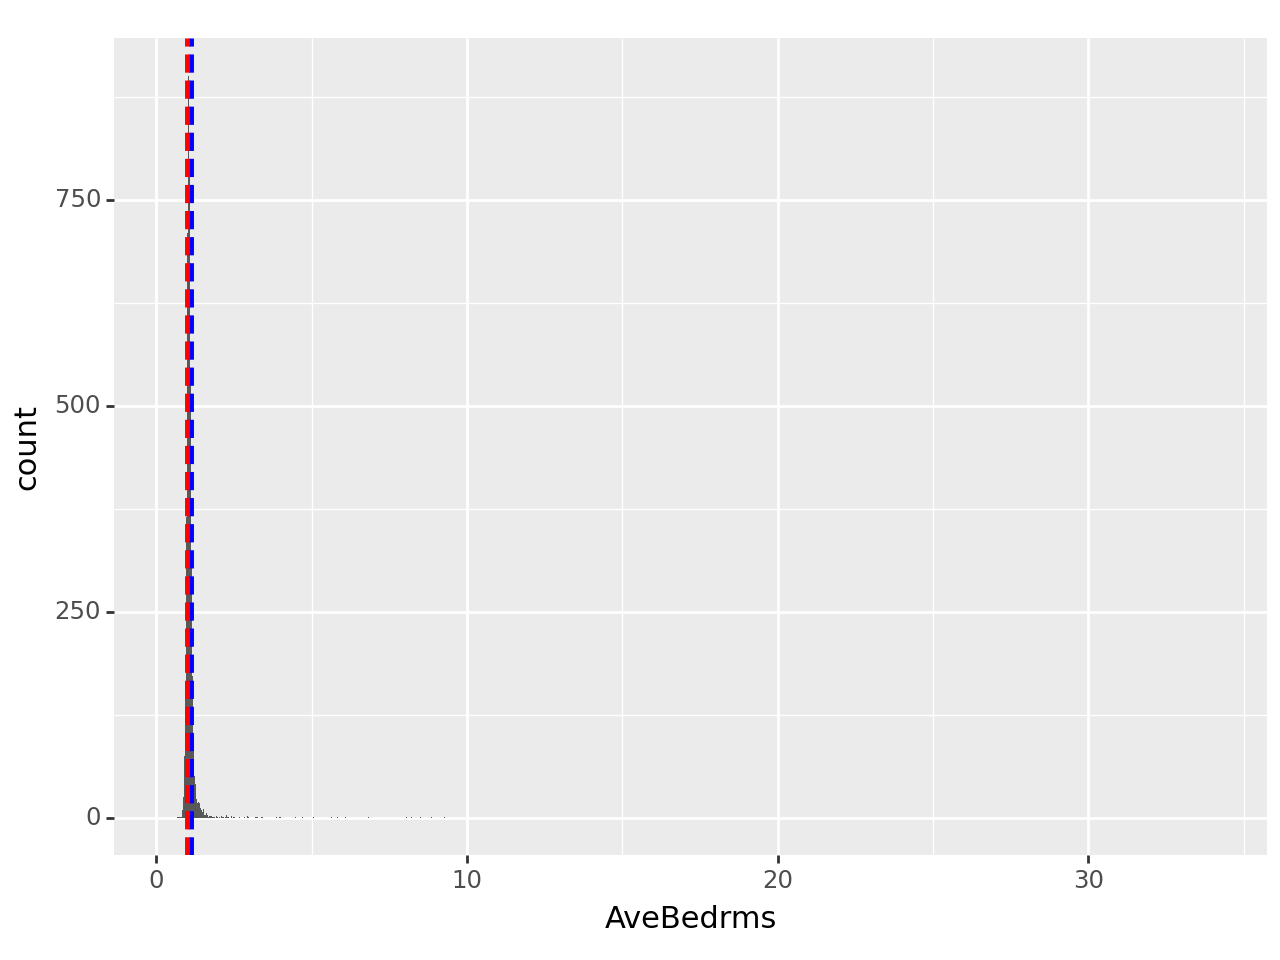

<Figure Size: (640 x 480)>

In [10]:
(
    ggplot(cali) + aes(x = "AveBedrms") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["AveBedrms"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["AveBedrms"])),
            color="red", linetype="dashed", size=1)
)

Observed: The variable AveBedrms seems to be normally distributed, with the most common value being 1 Bedroom

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 522'. Pick better value with 'binwidth'.


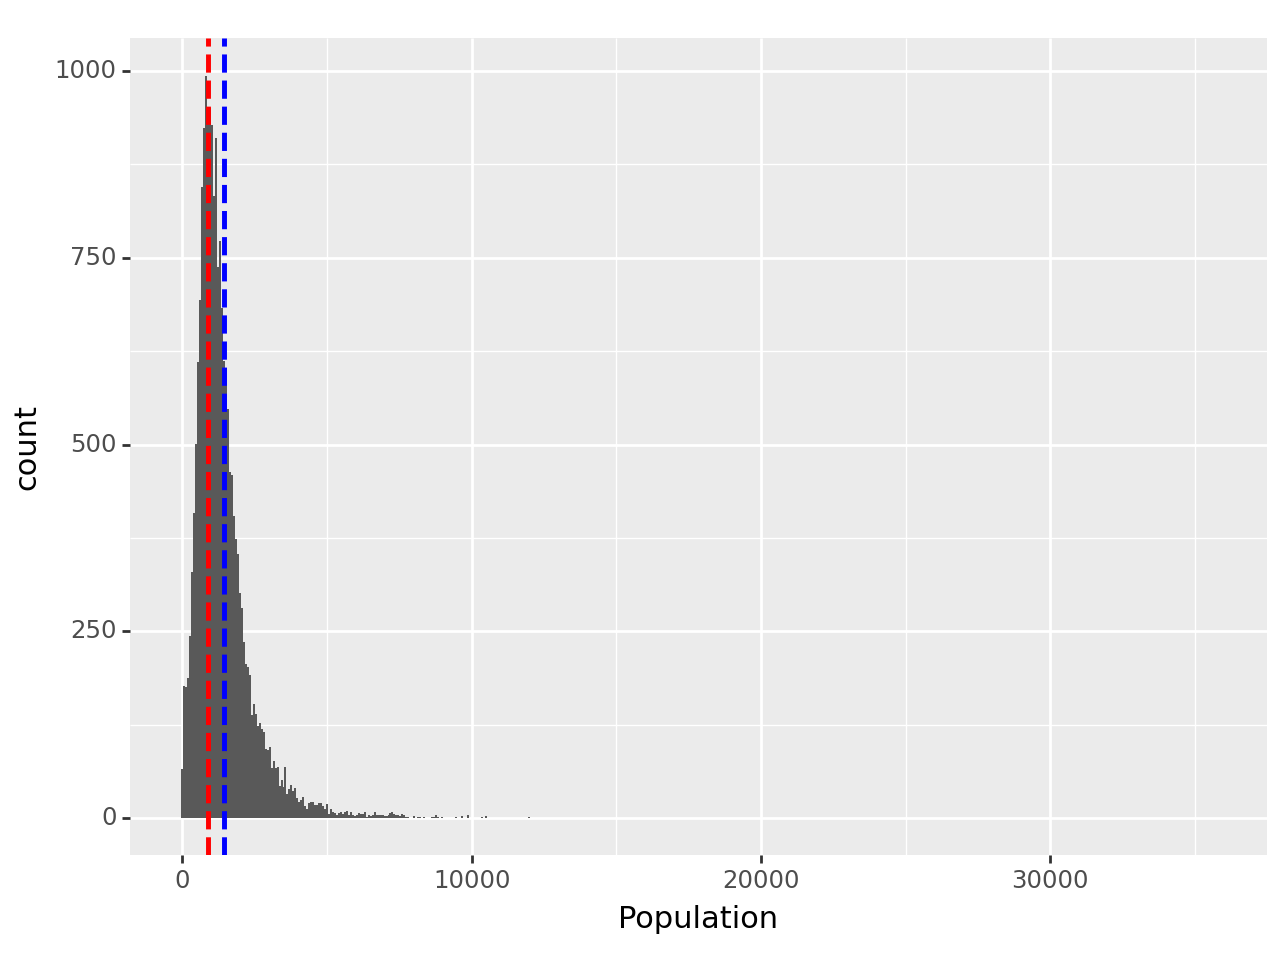

<Figure Size: (640 x 480)>

In [11]:
(
    ggplot(cali) + aes(x = "Population") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["Population"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["Population"])),
            color="red", linetype="dashed", size=1)
)

Observed: The variable Population seems to be normally distributed

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.


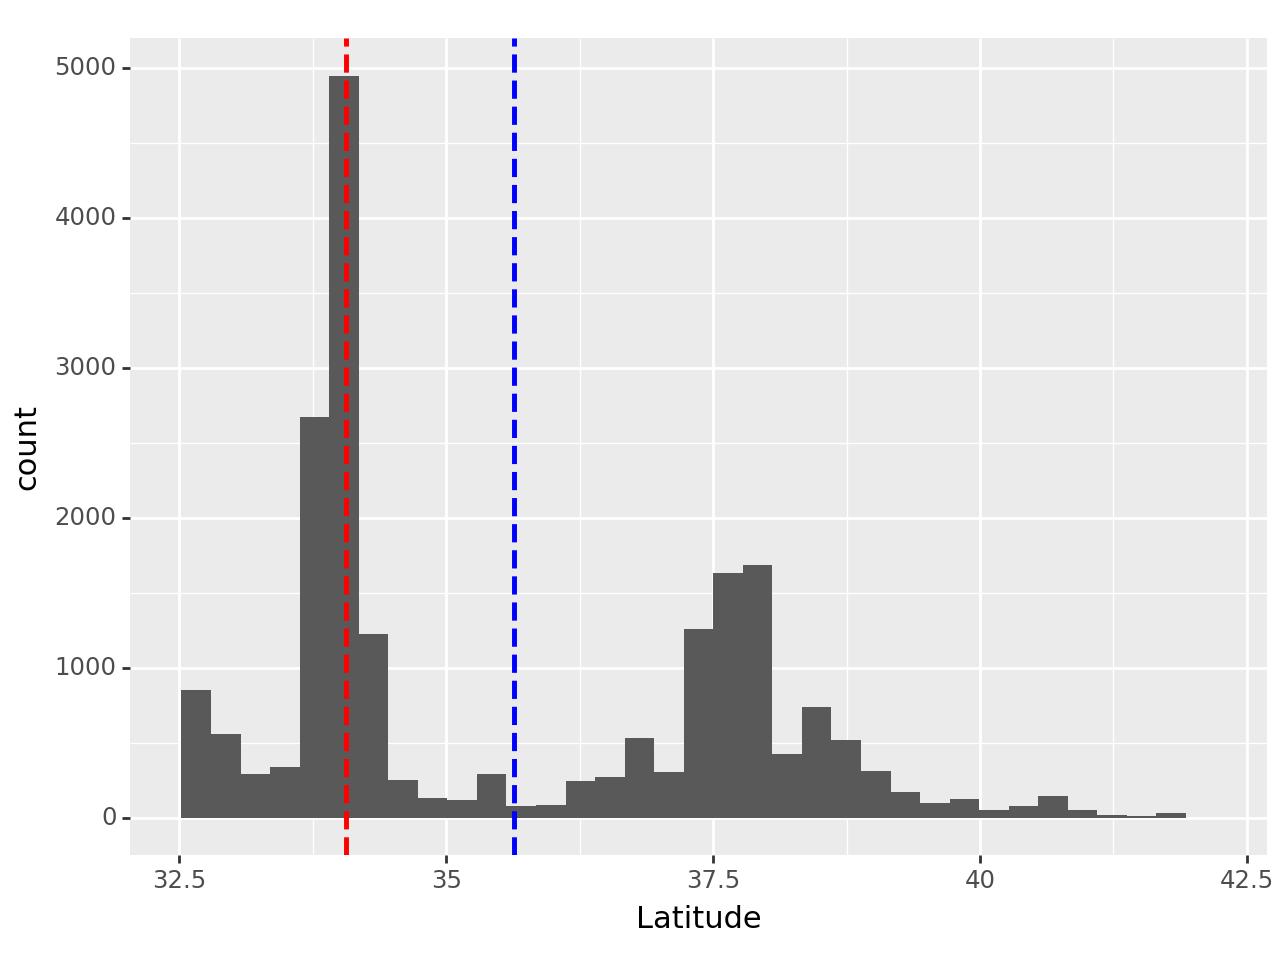

<Figure Size: (640 x 480)>

In [12]:
(
    ggplot(cali) + aes(x = "Latitude") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["Latitude"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["Latitude"])),
            color="red", linetype="dashed", size=1)
)

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


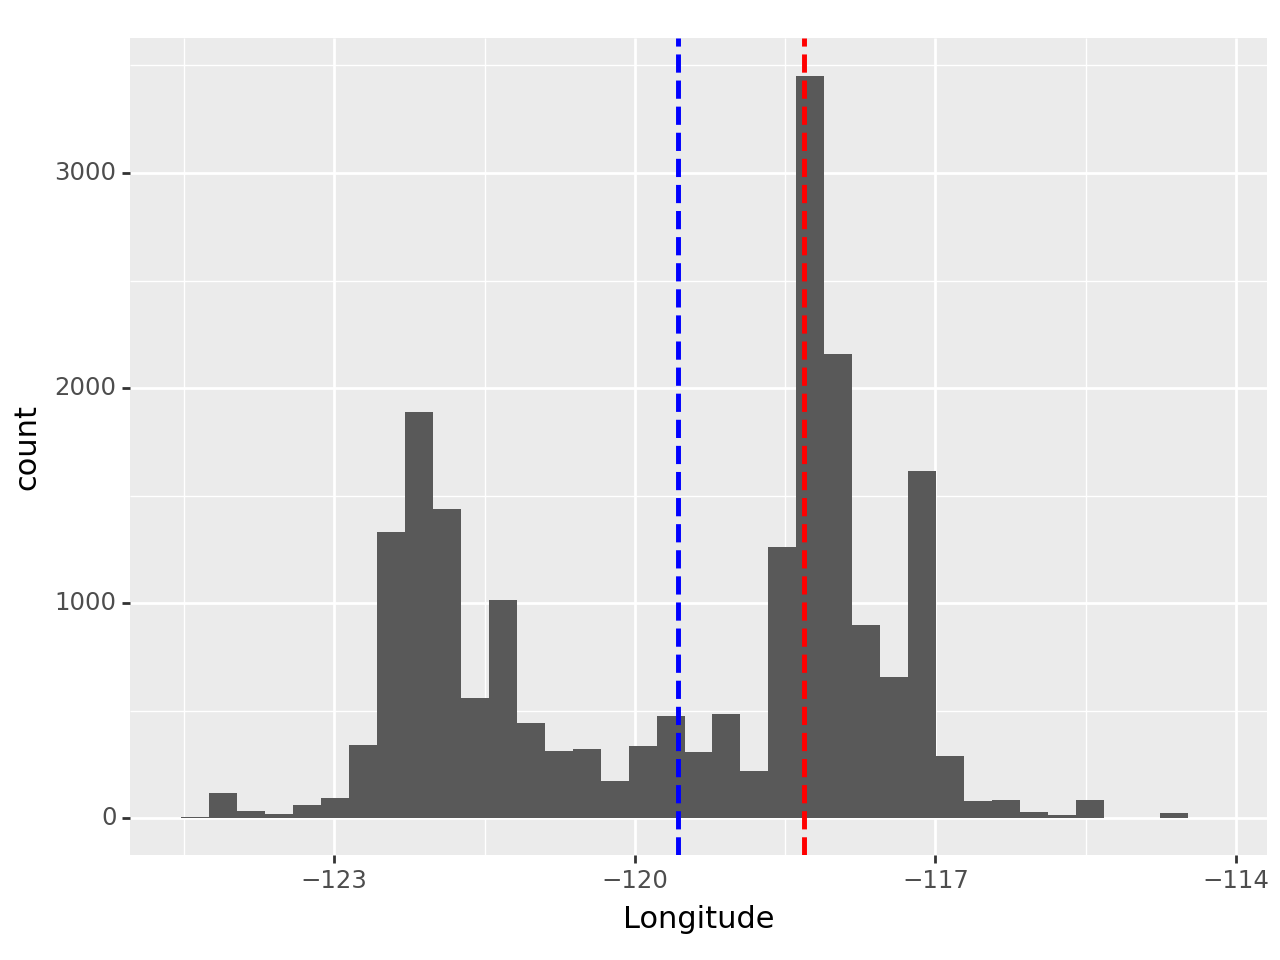

<Figure Size: (640 x 480)>

In [13]:
(
    ggplot(cali) + aes(x = "Longitude") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["Longitude"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["Longitude"])),
            color="red", linetype="dashed", size=1)
)

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: MedHouseVal.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.


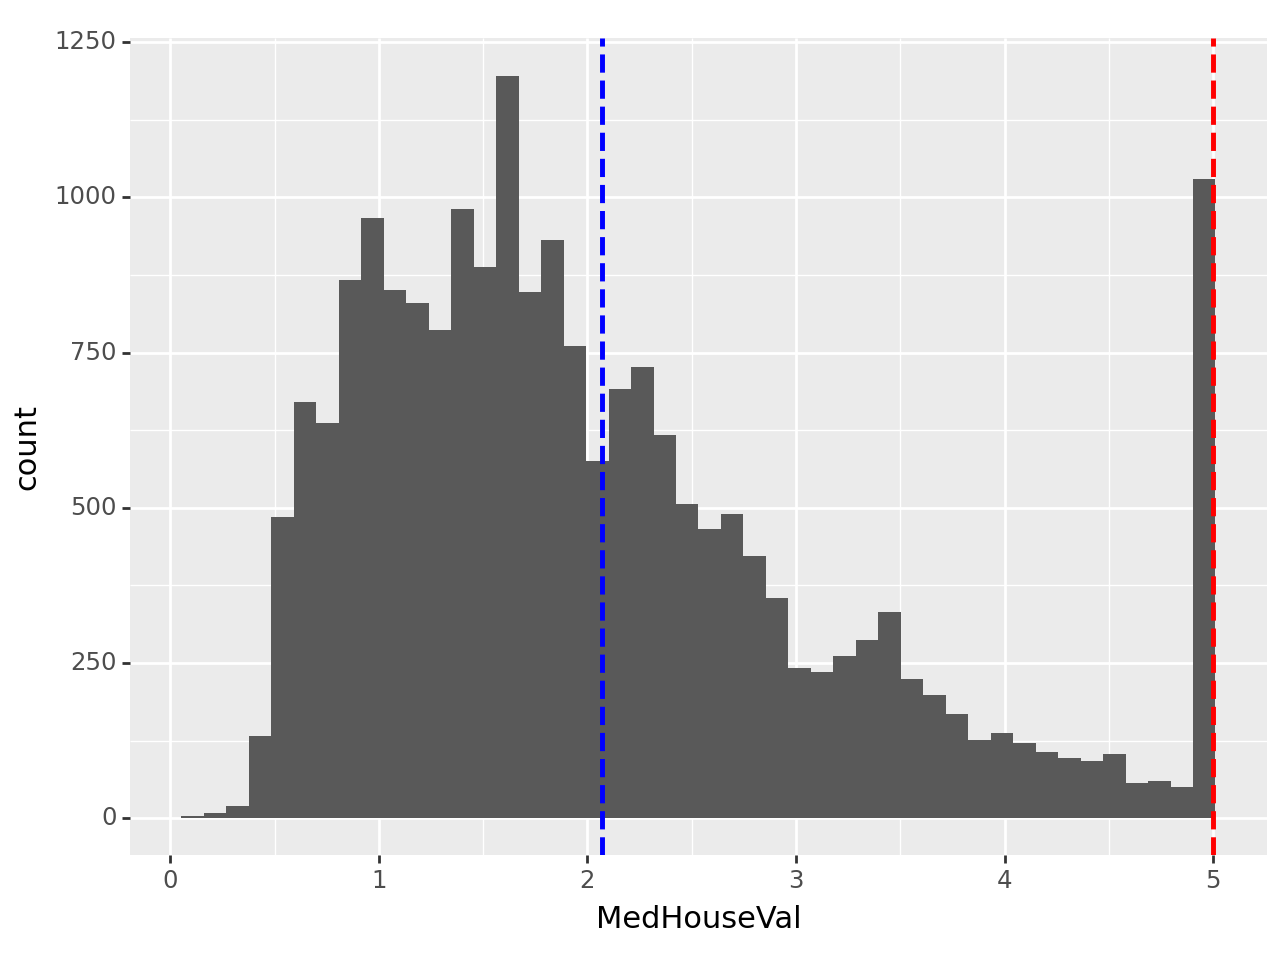

<Figure Size: (640 x 480)>

In [14]:
p = (
    ggplot(cali) + aes(x = "MedHouseVal") + geom_histogram()
    + geom_vline(aes(xintercept=mean(cali["MedHouseVal"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali["MedHouseVal"])),
            color="red", linetype="dashed", size=1)
)
p.save(filename = 'MedHouseVal.png', height=5, width=5, units = 'in', dpi=1000)
p

As we can see from the plots, there are a lot of observations that can be considered outliers, and most of the columns are not normally distributed. This can affect the regression. 

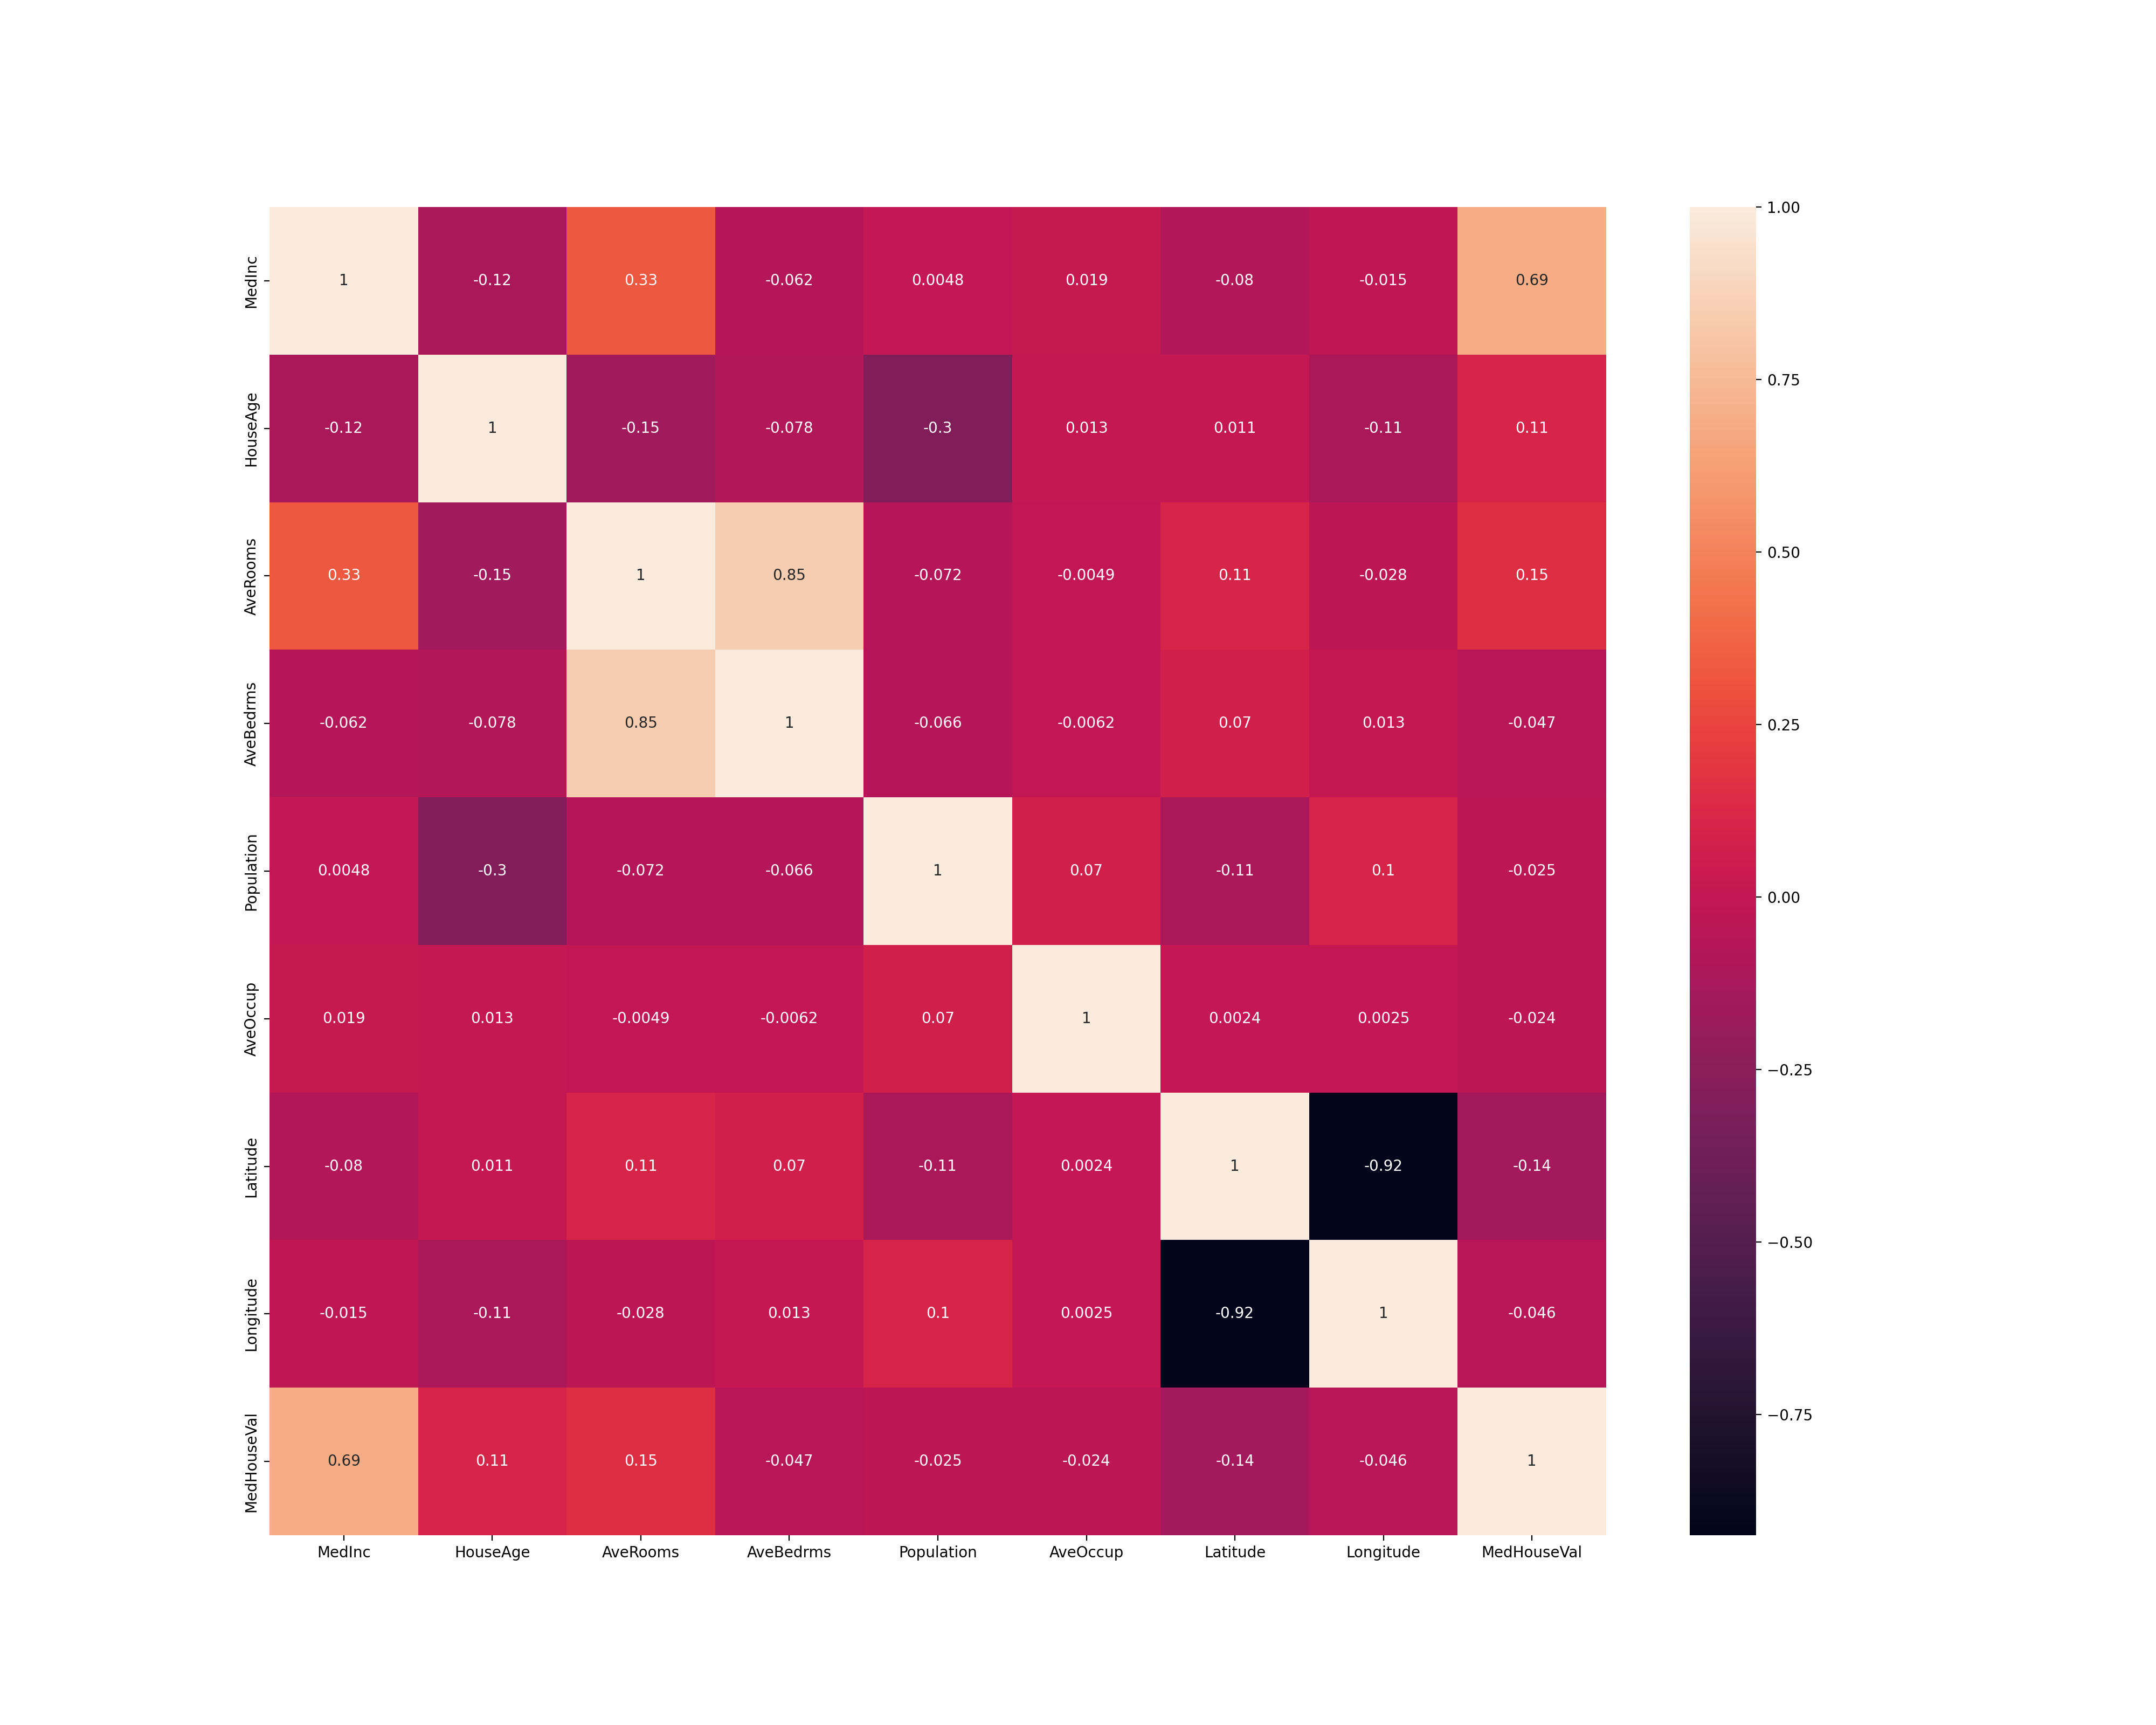

In [15]:
# Now, we can look at the correlation in the columns of the dataset
corr_y = pd.DataFrame(cali).corr()
plt.rcParams['figure.figsize'] = (20, 16)
sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True).figure.savefig("heatmap.png")

As we can see in the previous heatmap, MedInc, which is the median income, is highly correlated with the median house value. Therefore, it can be considered a highly important variable. 
Every other column does not seem to be highly correlated to the median house value. 
We can also see that number of bedrooms is highly correlated to the number of rooms, which could be used to reduce the dimensionality of the dataset. 

In [16]:
# Linear regression: OLS
best_RMSE = np.infty
# First attemp, all variables included
X = cali.drop(["MedHouseVal"],axis=1).copy()
y = cali["MedHouseVal"].copy()

In [17]:
lr = LinearRegression()
lr_pred = lr.fit(X, y)
cali_res = pd.DataFrame()
cali_res["predict"] = lr_pred.predict(X)

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: OLSresults.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 131'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/On

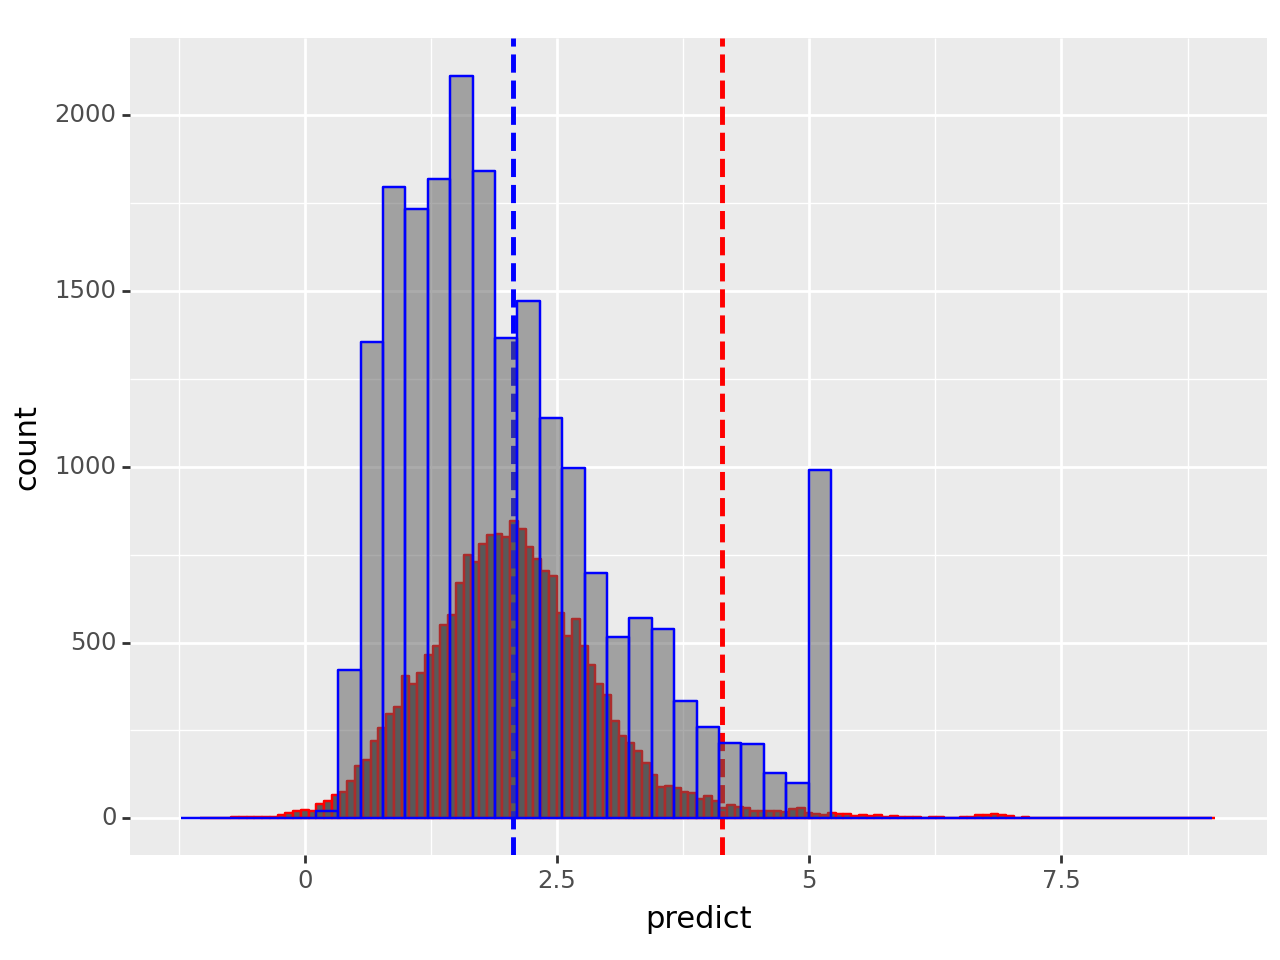

<Figure Size: (640 x 480)>

In [18]:
p = (
    ggplot(cali_res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    + geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
)
p.save(filename = 'OLSresults.png', height=5, width=5, units = 'in', dpi=1000)
p

As we can see in the above plot, the predicted values, in red, follow the general trend of the actual values, in blue, but the actual counts of the values are different

In [19]:
cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
MSE = mean(cali_res["sqerror"])
RMSE = sqrt(MSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print(MSE)
print(RMSE)

0.5243209861846072
0.7241001216576387


As we can see, the MSE is 0.52, which could be considerede to be low, but we have to compare the results with other regressions as well with other columns. 

In [20]:
# Obtaining the relevant columns with P-value
# Here we use the OLS (Ordinary Least Squares) function to help us
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:57:27   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

We can see that the population has a p-value over 0.05, which indicates low relevance in our model, so we will perform a new regression without including it

In [21]:
X = cali.drop(["MedHouseVal", "Population"],axis=1).copy()
lr = LinearRegression()
lr_pred = lr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = lr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print(MSE)
print(RMSE)

0.5243388023465959
0.7241124238311313


/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 131'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 131'. Pick better value with 'binwidth'.


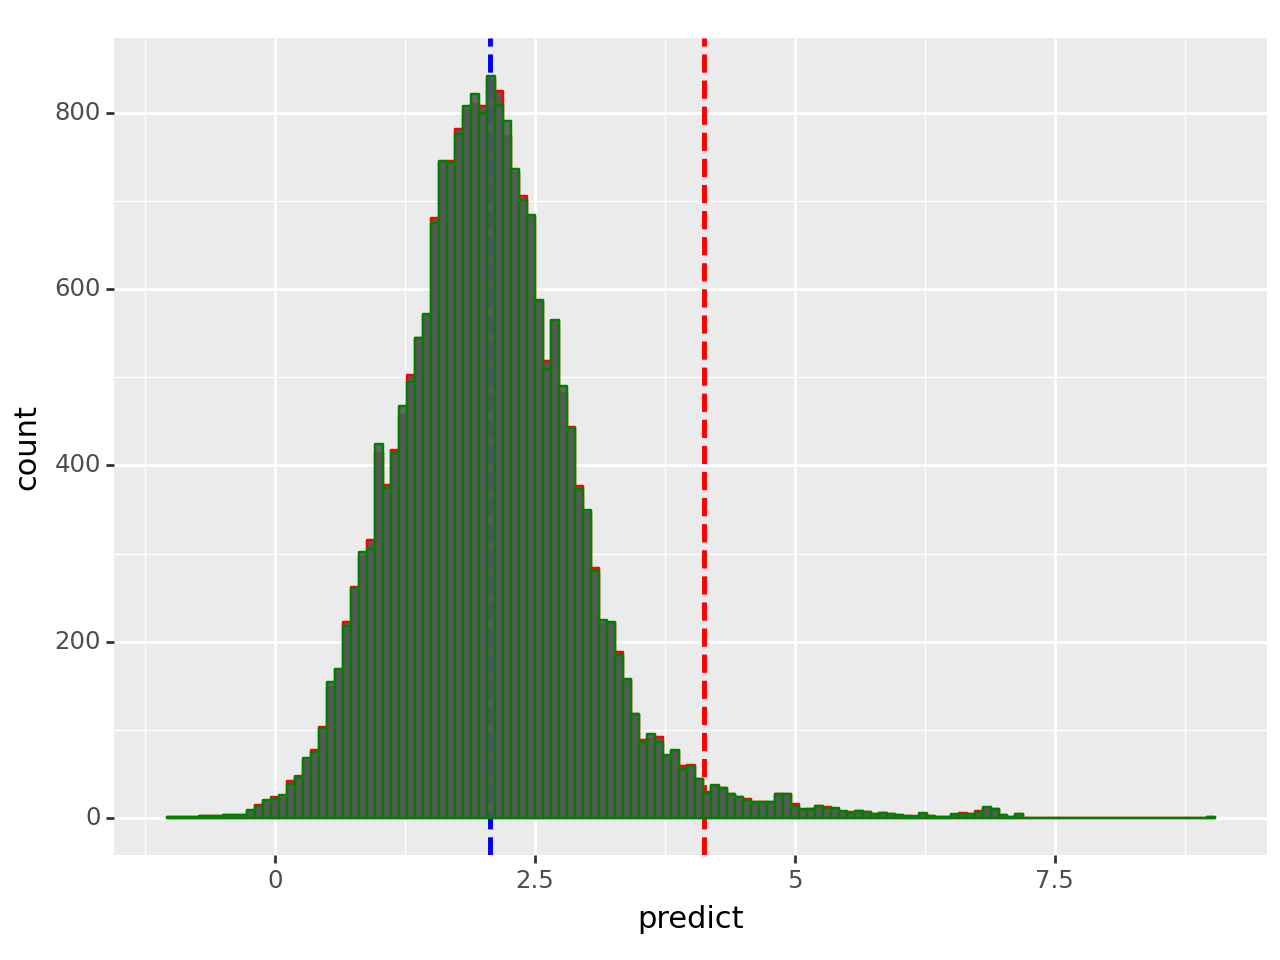

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(cali_res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    #+ geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
    + geom_histogram(aes(x = cali_res_reduced["predict"]), color = "green", alpha=0.9)
)

As we can see in the previous prediction, the MSE was not any different from using the full dataset, as well as the histogram of the predicted values, so we can conclude that the variable Population is not relevant to the regression.
Now we can try again by reducing either number of rooms of number of bedrooms, as these two are highly correlated

In [23]:
X = cali.drop(["MedHouseVal", "Population", "AveBedrms"],axis=1).copy()
lr = LinearRegression()
lr_pred = lr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = lr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print(MSE)
print(RMSE)

0.5376922531880642
0.7332750187944931


In [24]:
X = cali.drop(["MedHouseVal", "Population", "AveRooms"],axis=1).copy()
lr = LinearRegression()
lr_pred = lr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = lr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print(MSE)
print(RMSE)

0.5327724538259629
0.7299126343789117


We can see that the MSE increased when we removed either AveRooms or AveBedrms, as well as the RMSE, so our best result comes using the original dataset, or reducing it by removing the Population column, which does not affect the results
Additional data manipulation may be done to improve performance, such as using logs of the features instead of the features themselves, binning the latituted and longitude, create variables that are just operations of other variables, but the purpose of this application is not feature engineering by itself, but regression and applications of it

In [25]:
# Finally, what does our RMSE mean?
mean_house_val = mean(cali["MedHouseVal"])
error_percentage = best_RMSE / mean_house_val
OLS_RMSE = best_RMSE
all_results["OLS_RMSE"] = OLS_RMSE
print(error_percentage)

0.3500506451682155


As we can see, there is a total of 35% difference between or RMSE and the mean value of MedHouseVal, which would be considered as the mean value of the median house values
This can be considered a high error rate, so lets see if other regression methods improve on it

In [26]:
# Ridge regression (L2 regularization)
best_RMSE = np.infty
X = cali.drop(["MedHouseVal"],axis=1).copy()
y = cali["MedHouseVal"].copy()
rr = Ridge()
rr_pred = rr.fit(X, y)
cali_res = pd.DataFrame()
cali_res["predict"] = rr_pred.predict(X)
print("Ridge coefficients:")
print(rr.coef_)
print("Ridge used columns:")
print(rr.feature_names_in_)

Ridge coefficients:
[ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
Ridge used columns:
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


As we can see, the weight for the Latitude column are the lowest amont all the attributes, so we could get rid of it and try again

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: RidgeResults.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 130'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/

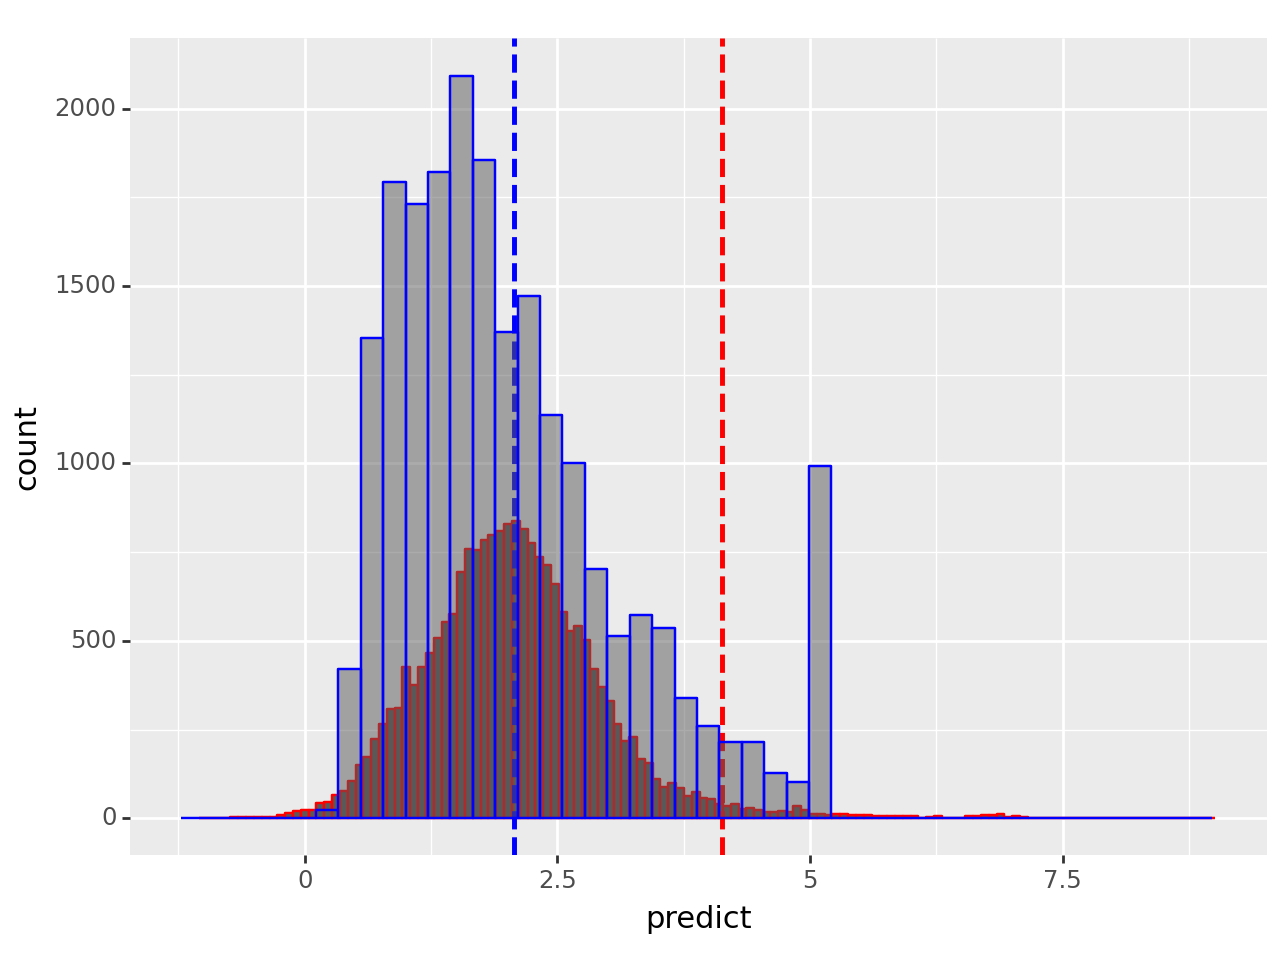

<Figure Size: (640 x 480)>

In [27]:
p = (
    ggplot(cali_res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    + geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
)
p.save(filename = 'RidgeResults.png', height=5, width=5, units = 'in', dpi=1000)
p

In [28]:
cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
MSE = mean(cali_res["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE

0.5243210214822195
0.7241001460310718


In [29]:
# Dropping Latitude
X = cali.drop(["MedHouseVal", "Latitude"],axis=1).copy()
rr = LinearRegression()
rr_pred = rr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = rr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print("Ridge coefficients:")
print(rr.coef_)
print("Ridge used columns:")
print(rr.feature_names_in_)

0.61141787877296
0.7819321446090831
Ridge coefficients:
[ 5.38442363e-01  1.61857402e-02 -2.15955821e-01  1.01357497e+00
  2.43974882e-05 -4.88468502e-03 -1.95828824e-02]
Ridge used columns:
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Longitude']


Unfortunately, if we drop Latitude, the RMSE increases, so we can try again with the columns in the OLS model

In [30]:
X = cali.drop(["MedHouseVal", "Population"],axis=1).copy()
rr = LinearRegression()
rr_pred = rr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = rr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE

0.5243388023465959
0.7241124238311313


In [31]:
X = cali.drop(["MedHouseVal", "Population", "AveBedrms"],axis=1).copy()
rr = LinearRegression()
rr_pred = rr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = rr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE

0.5376922531880642
0.7332750187944931


In [32]:
X = cali.drop(["MedHouseVal", "Population", "AveRooms"],axis=1).copy()
rr = LinearRegression()
rr_pred = rr.fit(X, y)
cali_res_reduced = pd.DataFrame()
cali_res_reduced["predict"] = rr_pred.predict(X)
cali_res_reduced["sqerror"] = (cali["MedHouseVal"] - cali_res_reduced["predict"])**2
#print(MSE)
MSE = mean(cali_res_reduced["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE

0.5327724538259629
0.7299126343789117


In [33]:
mean_house_val = mean(cali["MedHouseVal"])
error_percentage = best_RMSE / mean_house_val
ridge_rmse = best_RMSE
all_results["Ridge"] = ridge_rmse
print(error_percentage)
print(rr.feature_names_in_)

0.350050656951028
['MedInc' 'HouseAge' 'AveBedrms' 'AveOccup' 'Latitude' 'Longitude']


In [34]:
# Lasso regression (L1 regularization)
best_RMSE = np.infty
X = cali.drop(["MedHouseVal"],axis=1).copy()
y = cali["MedHouseVal"].copy()
lr = Lasso()
lr_pred = lr.fit(X, y)
cali_res = pd.DataFrame()
cali_res["predict"] = lr_pred.predict(X)
print("Lasso coefficients:")
print(lr.coef_)
print("Lasso used columns:")
print(lr.feature_names_in_)

Lasso coefficients:
[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Lasso used columns:
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


In [35]:
cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
MSE = mean(cali_res["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE

0.9517091796179765
0.9755558311126926


/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: LassoResults.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 103'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/

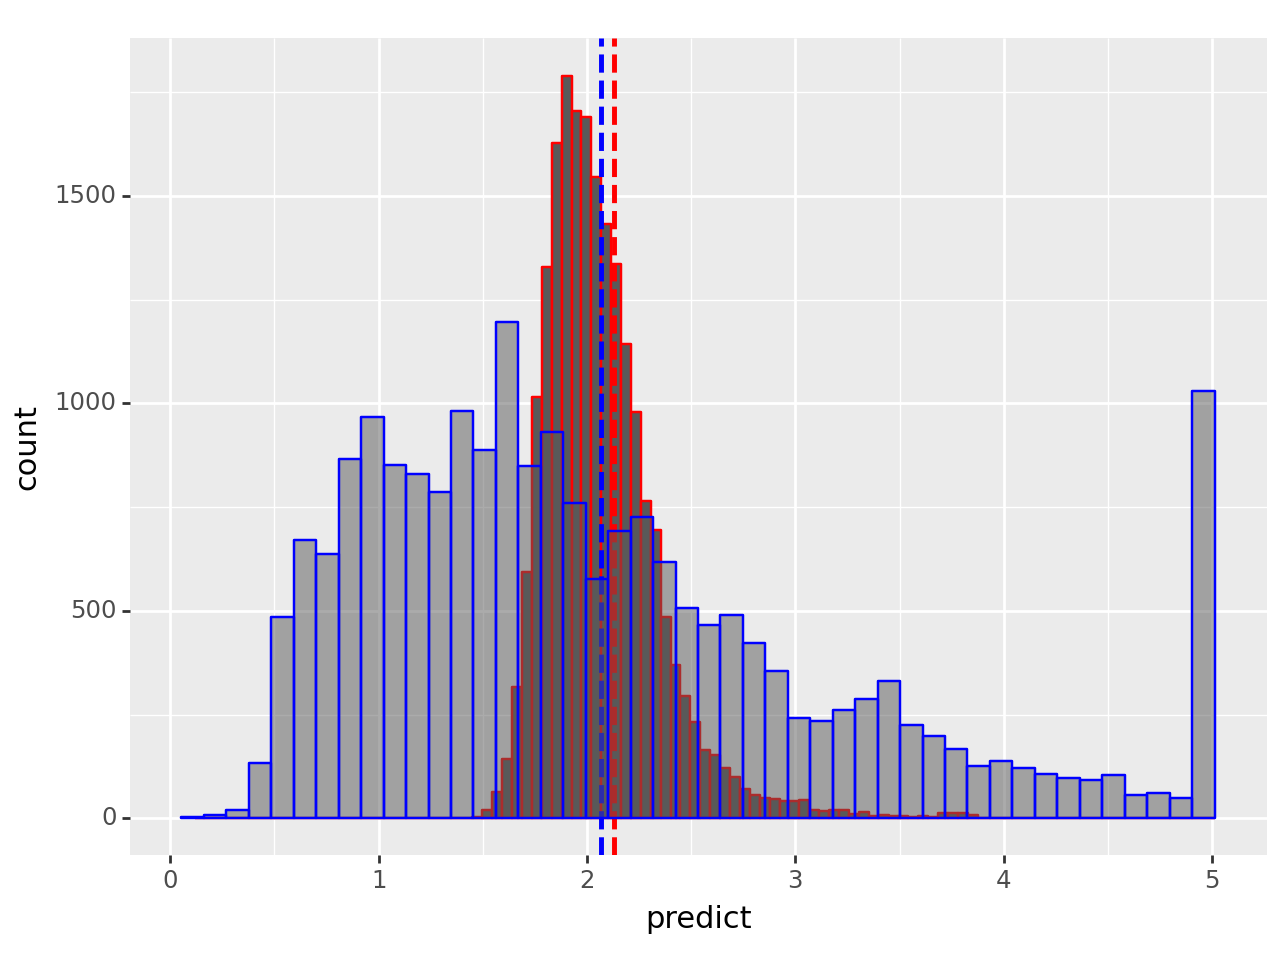

<Figure Size: (640 x 480)>

In [36]:
p = (
    ggplot(cali_res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    + geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
)
p.save(filename = 'LassoResults.png', height=5, width=5, units = 'in', dpi=1000)
p

As we can see, the actual MedHouseVal values and the predicted values are quite different, which makes sense with such a high RMSE

As we can see, Lasso regression dropped most of the features, but the results turned out to be not very good, with the highest RMSE out of every past regression method

In [37]:
lasso_rmse = best_RMSE
all_results["Lasso"] = lasso_rmse

In [38]:
# Just for curiosity, lets try performing OLS with only the coefficients Lasso used:
print(lr.coef_)
print(lr.feature_names_in_)

[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


In [39]:
X = cali[["MedInc", "HouseAge", "Latitude"]].copy()
y = cali["MedHouseVal"].copy()
lr = LinearRegression()
lr_pred = lr.fit(X, y)
cali_res = pd.DataFrame()
cali_res["predict"] = lr_pred.predict(X)
cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
MSE = mean(cali_res["sqerror"])
RMSE = sqrt(MSE)
best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
print(lr.coef_)
print(lr.feature_names_in_)
print(MSE)
print(RMSE)

[ 0.4273334   0.01745537 -0.04869748]
['MedInc' 'HouseAge' 'Latitude']
0.6428821991178675
0.8017993509088589


Although the results are better than using Lasso, the results are not as good as using OLS directly

In [40]:
# Polynomial regression
# For this, we will try several different degrees, and we will use linear regression
max_deg = 6 #After trial and error, 6 was the sweet spot, as anything above that took a long time to execute, and the RMSE increased
best_degree = 0
best_RMSE = np.infty
best_model = None
best_poly = None
X = cali.drop(["MedHouseVal"],axis=1).copy()
y = cali["MedHouseVal"].copy()
res = pd.DataFrame()
for i in range(1, max_deg+1):
    print("Max Degree: {}".format(i))
    LR = LinearRegression()
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_ = poly.fit_transform(X)
    LR.fit(X_, y)
    cali_res = pd.DataFrame()
    cali_res["predict"] = LR.predict(X_)
    cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
    MSE = mean(cali_res["sqerror"])
    RMSE = sqrt(MSE)
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_degree = i
        best_model = LR
        best_poly = poly
        res["predict"] = cali_res["predict"]
    best_RMSE = RMSE if RMSE < best_RMSE else best_RMSE
    print(MSE)
    print(RMSE)

poly_RMSE = best_RMSE
all_results["poly_RMSE"] = poly_RMSE
print("Best degree: {}".format(best_degree))
print("Best RMSE: {}".format(best_RMSE))

Max Degree: 1
0.5243209861846072
0.7241001216576387
Max Degree: 2
0.42170513669993004
0.6493882788439671
Max Degree: 3
0.3489005989208559
0.5906780840024928
Max Degree: 4
0.4465094555935036
0.6682136302063163
Max Degree: 5
0.3437992345641925
0.5863439558520174
Max Degree: 6
0.4465320380913422
0.6682305276559446
Best degree: 5
Best RMSE: 0.5863439558520174


/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: PolynomialResults.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/ri

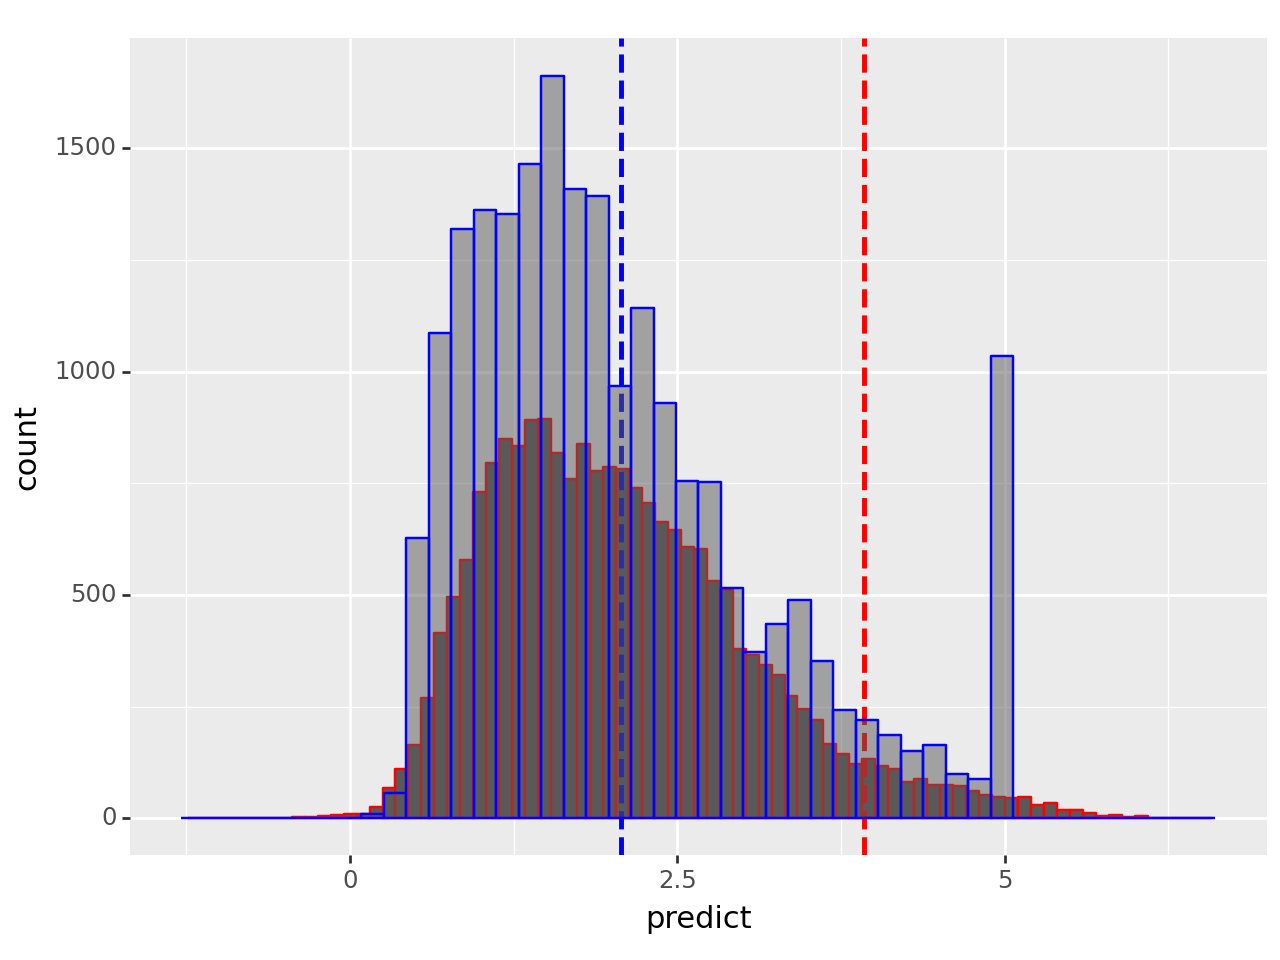

<Figure Size: (640 x 480)>

In [41]:
p= (
    ggplot(res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    + geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
)
p.save(filename = 'PolynomialResults.png', height=5, width=5, units = 'in', dpi=1000)
p

In [42]:
# Bayesian regression
X = cali.drop(["MedHouseVal"],axis=1).copy()
y = cali["MedHouseVal"].copy()
bayesian = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
bayesian_pred = bayesian.fit(X, y)
cali_res = pd.DataFrame()
cali_res["predict"] = bayesian_pred.predict(X)
print("Bayesian coefficients:")
print(bayesian.coef_)
print("Bayesian used columns:")
print(rr.feature_names_in_)
cali_res["sqerror"] = (cali["MedHouseVal"] - cali_res["predict"])**2
MSE = mean(cali_res["sqerror"])
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)
all_results["Bayesian"] = RMSE

Bayesian coefficients:
[ 5.12837640e-01  1.56567509e-02 -1.81280436e-01  8.58612903e-01
  7.80869989e-06 -4.69747352e-03 -6.41184926e-02 -1.64573575e-02]
Bayesian used columns:
['MedInc' 'HouseAge' 'AveBedrms' 'AveOccup' 'Latitude' 'Longitude']
0.604210885619642
0.7773100318532123


/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 5 x 5 in image.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: BayesianResults.png
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 154'. Pick better value with 'binwidth'.
/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.
/mnt/c/Users/rin

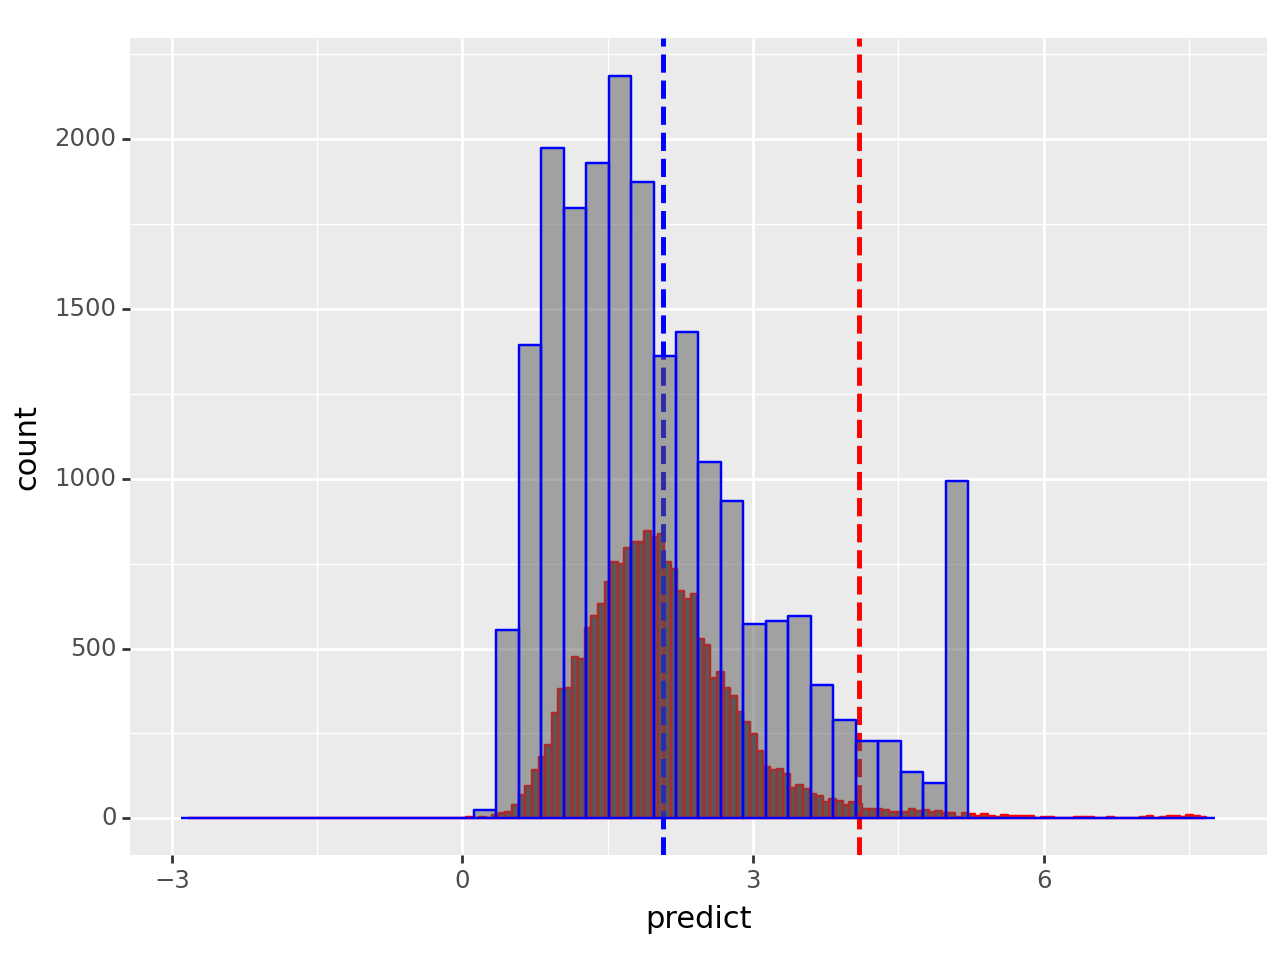

<Figure Size: (640 x 480)>

In [43]:
p = (
    ggplot(cali_res) + aes(x = "predict") + geom_histogram(color="red")
    + geom_vline(aes(xintercept=mean(cali_res["predict"])),
            color="blue", linetype="dashed", size=1)
    + geom_vline(aes(xintercept=mode(cali_res["predict"])),
            color="red", linetype="dashed", size=1)
    + geom_histogram(aes(x = cali["MedHouseVal"]), color = "blue", alpha=0.5)
)
p.save(filename = 'BayesianResults.png', height=5, width=5, units = 'in', dpi=1000)
p

In [44]:
for k,v in all_results.items():
    print(k,v)

OLS_RMSE 0.7241001216576387
Ridge 0.7241001460310718
Lasso 0.9755558311126926
poly_RMSE 0.5863439558520174
Bayesian 0.7773100318532123


As we can see, the best results were with Polynomial regression. 